# ANSWER 1

In [ ]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


# ANSWER 2

In [3]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [4]:
df=pd.read_csv('wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [5]:
df.shape

(1599, 12)

# ANSWER 3

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

THERE IS NO NULL VALUE

In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['quality']


In [9]:
wine_data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# ANSWER 4

In [12]:
X = wine_data_encoded.drop('quality_good', axis=1)
y = wine_data_encoded['quality_good']

In [13]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [14]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality_good, Length: 1599, dtype: uint8

# ANSWER 5

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ANSWER 6

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ANSWER 7 & 8

In [20]:
import tensorflow as tf
from tensorflow import keras

In [21]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# ANSWER 9

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


# ANSWER 10 & 11

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ANSWER 12

In [24]:
batch_size = 32
epochs = 50
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), batch_size=batch_size, epochs=epochs)

Epoch 1/50
35/35 [==============================] - 1s 6ms/step - loss: 0.5884 - accuracy: 0.7131 - val_loss: 0.5793 - val_accuracy: 0.7042
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7489 - val_loss: 0.5700 - val_accuracy: 0.6875
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.7605 - val_loss: 0.5632 - val_accuracy: 0.7000
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.7676 - val_loss: 0.5776 - val_accuracy: 0.6875
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.7516 - val_loss: 0.5656 - val_accuracy: 0.7000
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7623 - val_loss: 0.5661 - val_accuracy: 0.6875
Epoch 7/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.7668 - val_loss: 0.5598 - val_accuracy: 0.6958
Epoch 8/50
35/35 [==

# ANSWER 13

In [25]:
model_params = model.get_weights()

In [26]:
model_params

[array([[-3.86595398e-01,  2.12711647e-01,  1.30893122e-02,
         -1.14170216e-01, -1.29838780e-01,  3.24787736e-01,
         -2.18638480e-01,  2.52843559e-01,  2.78202832e-01,
         -2.78354973e-01,  2.04583392e-01, -6.53912798e-02,
          2.35597938e-01,  3.28285128e-01, -2.99604893e-01,
         -5.25869094e-02, -2.12021276e-01,  1.20617911e-01,
         -3.15420657e-01, -5.40503077e-02, -9.11280047e-03,
          2.54930943e-01, -4.07378003e-02,  1.11256763e-02,
          2.69439131e-01, -6.32790178e-02,  2.07226828e-01,
          5.50892055e-02, -5.01946500e-03, -1.08786404e-01,
          1.79265305e-01, -2.41923392e-01,  2.82418936e-01,
          9.59639177e-02,  2.83408850e-01, -1.83616374e-02,
         -1.60134360e-01,  1.61954816e-02,  3.61558236e-02,
         -3.12817842e-01,  1.76645786e-01,  2.91810423e-01,
         -1.76342856e-02,  3.46873641e-01,  1.11641377e-01,
         -4.36038151e-02,  7.18794912e-02,  1.96894929e-01,
         -2.00930879e-01,  4.88510914e-0

# ANSWER 14

In [27]:
history_df = pd.DataFrame(history.history)

In [28]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.588391,0.713137,0.579334,0.704167
1,0.524014,0.748883,0.570048,0.687500
2,0.508763,0.760500,0.563195,0.700000
3,0.498777,0.767650,0.577610,0.687500
4,0.493879,0.751564,0.565626,0.700000
5,0.486656,0.762288,0.566054,0.687500
6,0.483385,0.766756,0.559766,0.695833
7,0.482913,0.771224,0.560583,0.687500
8,0.475992,0.775693,0.563135,0.695833
9,0.473130,0.773905,0.556462,0.700000


# ANSWER 15

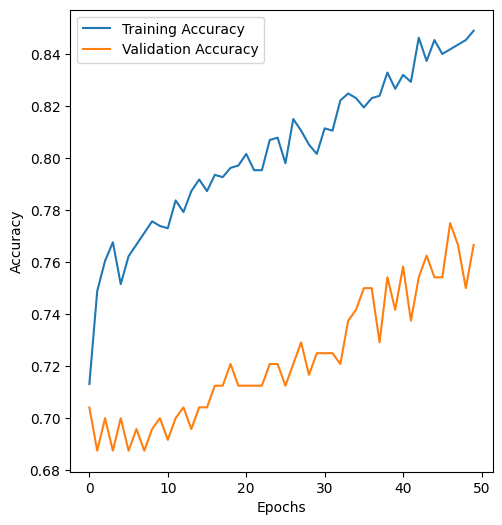

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

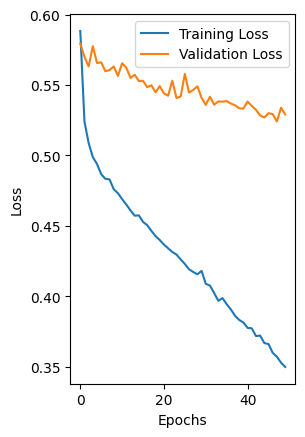

In [30]:
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ANSWER 16

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
y_pred = model.predict(X_test_scaled)
y_pred_binary = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)

print("Test Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

8/8 [==============================] - 0s 1ms/step
Test Accuracy: 0.7916666666666666
Confusion Matrix:
 [[ 84  26]
 [ 24 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77       110
           1       0.80      0.82      0.81       130

    accuracy                           0.79       240
   macro avg       0.79      0.79      0.79       240
weighted avg       0.79      0.79      0.79       240

